In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define file paths
output_file_path = "/content/drive/MyDrive/CAPSTONE/balanced_AR1_nearmiss.csv"

# Load JM1 dataset
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE/ar1.csv")

# Datset Cleaning

In [7]:
# See first 5 rows of dataset
df.head(5)

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,7.0,0.0,4.0,0.0,3.0,8.0,6.0,10.0,12.0,14.0,...,0.0,0.0,1.0,0.33,0.00,0.0,0.00,0.14,0.0,b'false'
1,9.0,0.0,1.0,0.0,8.0,7.0,8.0,15.0,20.0,15.0,...,0.0,0.0,2.0,0.25,0.00,0.0,0.00,0.22,0.0,b'false'
2,21.0,0.0,14.0,1.0,7.0,15.0,12.0,21.0,36.0,27.0,...,4.0,1.0,4.0,0.57,1.00,1.0,0.25,0.19,0.0,b'false'
3,30.0,0.0,11.0,0.0,19.0,16.0,18.0,50.0,70.0,34.0,...,9.0,2.0,9.0,0.47,1.11,1.0,0.11,0.30,0.0,b'true'
4,8.0,0.0,2.0,0.0,6.0,4.0,5.0,5.0,10.0,9.0,...,1.0,0.0,2.0,0.33,1.00,1.0,0.50,0.25,0.0,b'false'


In [8]:
df['defects'] = df['defects'].str.strip("b'").map({'true': True, 'false': False})

# Basic Information

In [9]:
# See first 5 rows of dataset
df.head(5)

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
0,7.0,0.0,4.0,0.0,3.0,8.0,6.0,10.0,12.0,14.0,...,0.0,0.0,1.0,0.33,0.00,0.0,0.00,0.14,0.0,False
1,9.0,0.0,1.0,0.0,8.0,7.0,8.0,15.0,20.0,15.0,...,0.0,0.0,2.0,0.25,0.00,0.0,0.00,0.22,0.0,False
2,21.0,0.0,14.0,1.0,7.0,15.0,12.0,21.0,36.0,27.0,...,4.0,1.0,4.0,0.57,1.00,1.0,0.25,0.19,0.0,False
3,30.0,0.0,11.0,0.0,19.0,16.0,18.0,50.0,70.0,34.0,...,9.0,2.0,9.0,0.47,1.11,1.0,0.11,0.30,0.0,True
4,8.0,0.0,2.0,0.0,6.0,4.0,5.0,5.0,10.0,9.0,...,1.0,0.0,2.0,0.33,1.00,1.0,0.50,0.25,0.0,False




* Many of the features in the dataset is of float64
* Target Feature: **defects** (Variable Type: boolean)
* No of features: 22



In [10]:
# Basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_loc                         121 non-null    float64
 1   blank_loc                         121 non-null    float64
 2   comment_loc                       121 non-null    float64
 3   code_and_comment_loc              121 non-null    float64
 4   executable_loc                    121 non-null    float64
 5   unique_operands                   121 non-null    float64
 6   unique_operators                  121 non-null    float64
 7   total_operands                    121 non-null    float64
 8   total_operators                   121 non-null    float64
 9   halstead_vocabulary               121 non-null    float64
 10  halstead_length                   121 non-null    float64
 11  halstead_volume                   121 non-null    float64
 12  halstead

Analysis
* No Null values in dataset
* No of samples: 13204

Data Type Count
* Bool: 1
* float64: 17
* int64: 4

In [11]:
# Mean, Median and Mode
df.describe()

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,call_pairs,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,20.388430,0.206612,4.760331,0.074380,15.421488,12.454545,8.330579,23.743802,36.876033,20.785124,...,2.239669,4.396694,0.991736,4.570248,0.312479,0.683140,2.239669,0.681818,0.253554,0.330579
std,19.601178,1.040171,6.114225,0.293408,15.262018,10.000000,4.156097,24.096863,36.343631,13.453133,...,3.413270,6.527480,1.604659,4.857685,0.103773,0.581892,3.413270,1.205867,0.104018,0.568454
min,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.130000,0.000000,0.000000,0.000000,0.030000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,6.000000,11.000000,10.000000,...,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.170000,0.000000
50%,12.000000,0.000000,3.000000,0.000000,8.000000,9.000000,8.000000,16.000000,25.000000,18.000000,...,1.000000,2.000000,1.000000,3.000000,0.300000,1.000000,1.000000,0.170000,0.250000,0.000000
75%,32.000000,0.000000,7.000000,0.000000,23.000000,17.000000,11.000000,35.000000,56.000000,28.000000,...,3.000000,8.000000,1.000000,6.000000,0.330000,1.000000,3.000000,0.670000,0.330000,1.000000
max,95.000000,9.000000,30.000000,2.000000,82.000000,47.000000,19.000000,118.000000,184.000000,62.000000,...,19.000000,38.000000,10.000000,28.000000,0.600000,2.000000,19.000000,6.000000,0.500000,3.000000


# Exploratory Data Analysis

## Class Distribution Of Defective/Non-Defective Modules

In [12]:
# Target Variable is 'defects' column
class_distribution = df['defects'].value_counts()
class_distribution

defects
False    112
True       9
Name: count, dtype: int64

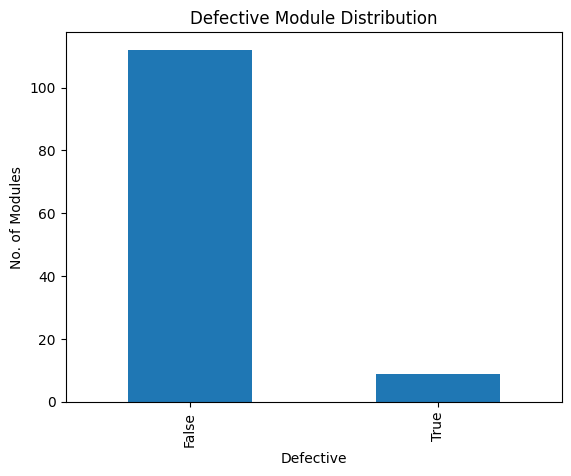

In [13]:
# Plotting class distribution
class_distribution.plot(kind='bar')
plt.title('Defective Module Distribution')
plt.xlabel('Defective')
plt.ylabel('No. of Modules')
plt.show()

## Correlation Matrix

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

In [15]:
correlation_matrix

,total_loc,blank_loc,comment_loc,code_and_comment_loc,executable_loc,unique_operands,unique_operators,total_operands,total_operators,halstead_vocabulary,...,condition_count,multiple_condition_count,cyclomatic_complexity,cyclomatic_density,decision_density,design_complexity,design_density,normalized_cyclomatic_complexity,formal_parameters,defects
total_loc,1.000000,0.310750,0.763985,0.309365,0.957067,0.922931,0.763673,0.951972,0.972246,0.921957,...,0.859563,0.767910,0.893596,-0.172874,0.480921,0.697234,0.057889,-0.303668,0.104304,0.192829
blank_loc,0.310750,1.000000,0.475630,0.222276,0.140399,0.265691,0.032260,0.159388,0.176592,0.207460,...,0.030785,0.050958,0.063898,-0.135257,0.071201,0.523437,0.283188,-0.251767,-0.088288,0.004272
comment_loc,0.763985,0.475630,1.000000,0.465251,0.548161,0.828012,0.550472,0.717904,0.701894,0.785537,...,0.417498,0.376915,0.474602,-0.137881,0.380479,0.680000,0.348134,-0.488699,-0.048943,0.093924
code_and_comment_loc,0.309365,0.222276,0.465251,1.000000,0.195784,0.360446,0.225684,0.300917,0.297053,0.337648,...,0.080190,0.125214,0.110316,0.032210,0.264632,0.256645,0.042010,-0.191675,0.001239,-0.072161
executable_loc,0.957067,0.140399,0.548161,0.195784,1.000000,0.835506,0.758067,0.924161,0.955440,0.855241,...,0.934592,0.831764,0.953167,-0.157568,0.460373,0.587371,-0.084421,-0.177064,0.159583,0.209734
unique_operands,0.922931,0.265691,0.828012,0.360446,0.835506,1.000000,0.766508,0.931418,0.920836,0.980120,...,0.688140,0.592262,0.747379,-0.253971,0.520883,0.644499,0.129195,-0.419602,0.115545,0.148364
unique_operators,0.763673,0.032260,0.550472,0.225684,0.758067,0.766508,1.000000,0.824044,0.828930,0.878693,...,0.705624,0.610189,0.759980,-0.069736,0.617813,0.412037,-0.147476,-0.234056,0.270812,0.327420
total_operands,0.951972,0.159388,0.717904,0.300917,0.924161,0.931418,0.824044,1.000000,0.992169,0.946916,...,0.808757,0.724718,0.866094,-0.180301,0.452931,0.668946,0.039641,-0.298954,0.164409,0.235345
total_operators,0.972246,0.176592,0.701894,0.297053,0.955440,0.920836,0.828930,0.992169,1.000000,0.940560,...,0.856191,0.766597,0.904276,-0.150257,0.481059,0.669726,0.008134,-0.264471,0.163345,0.234198
halstead_vocabulary,0.921957,0.207460,0.785537,0.337648,0.855241,0.980120,0.878693,0.946916,0.940560,1.000000,...,0.729499,0.628748,0.790324,-0.210326,0.578046,0.606361,0.050473,-0.384206,0.169549,0.211432


In [16]:
target_correlation = correlation_matrix['defects'].drop('defects')

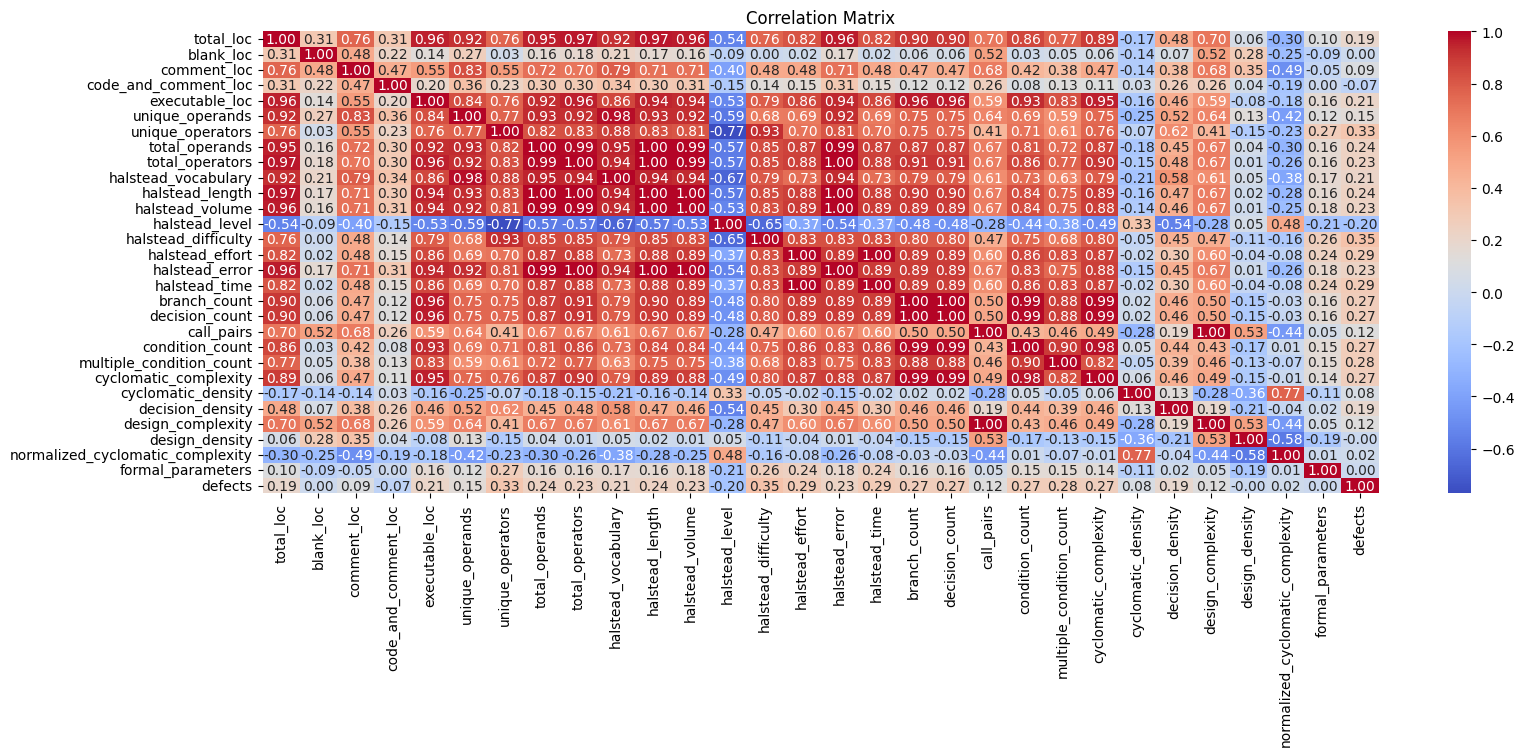

In [17]:
# Plot the correlation matrix
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Analysis
* Target Feature is uniformly correlated to all the features
* From the heatmap we get that "loc, v(g), n, LOCode, uniq_Opnd, total_Op and total_Opnd and branchCount" are mostly correlated with min of +.2 correlation.
* Except **Program length** all other have positive correlation with defects.

## Box Plot

ValueError: num must be an integer with 1 <= num <= 24, not 25

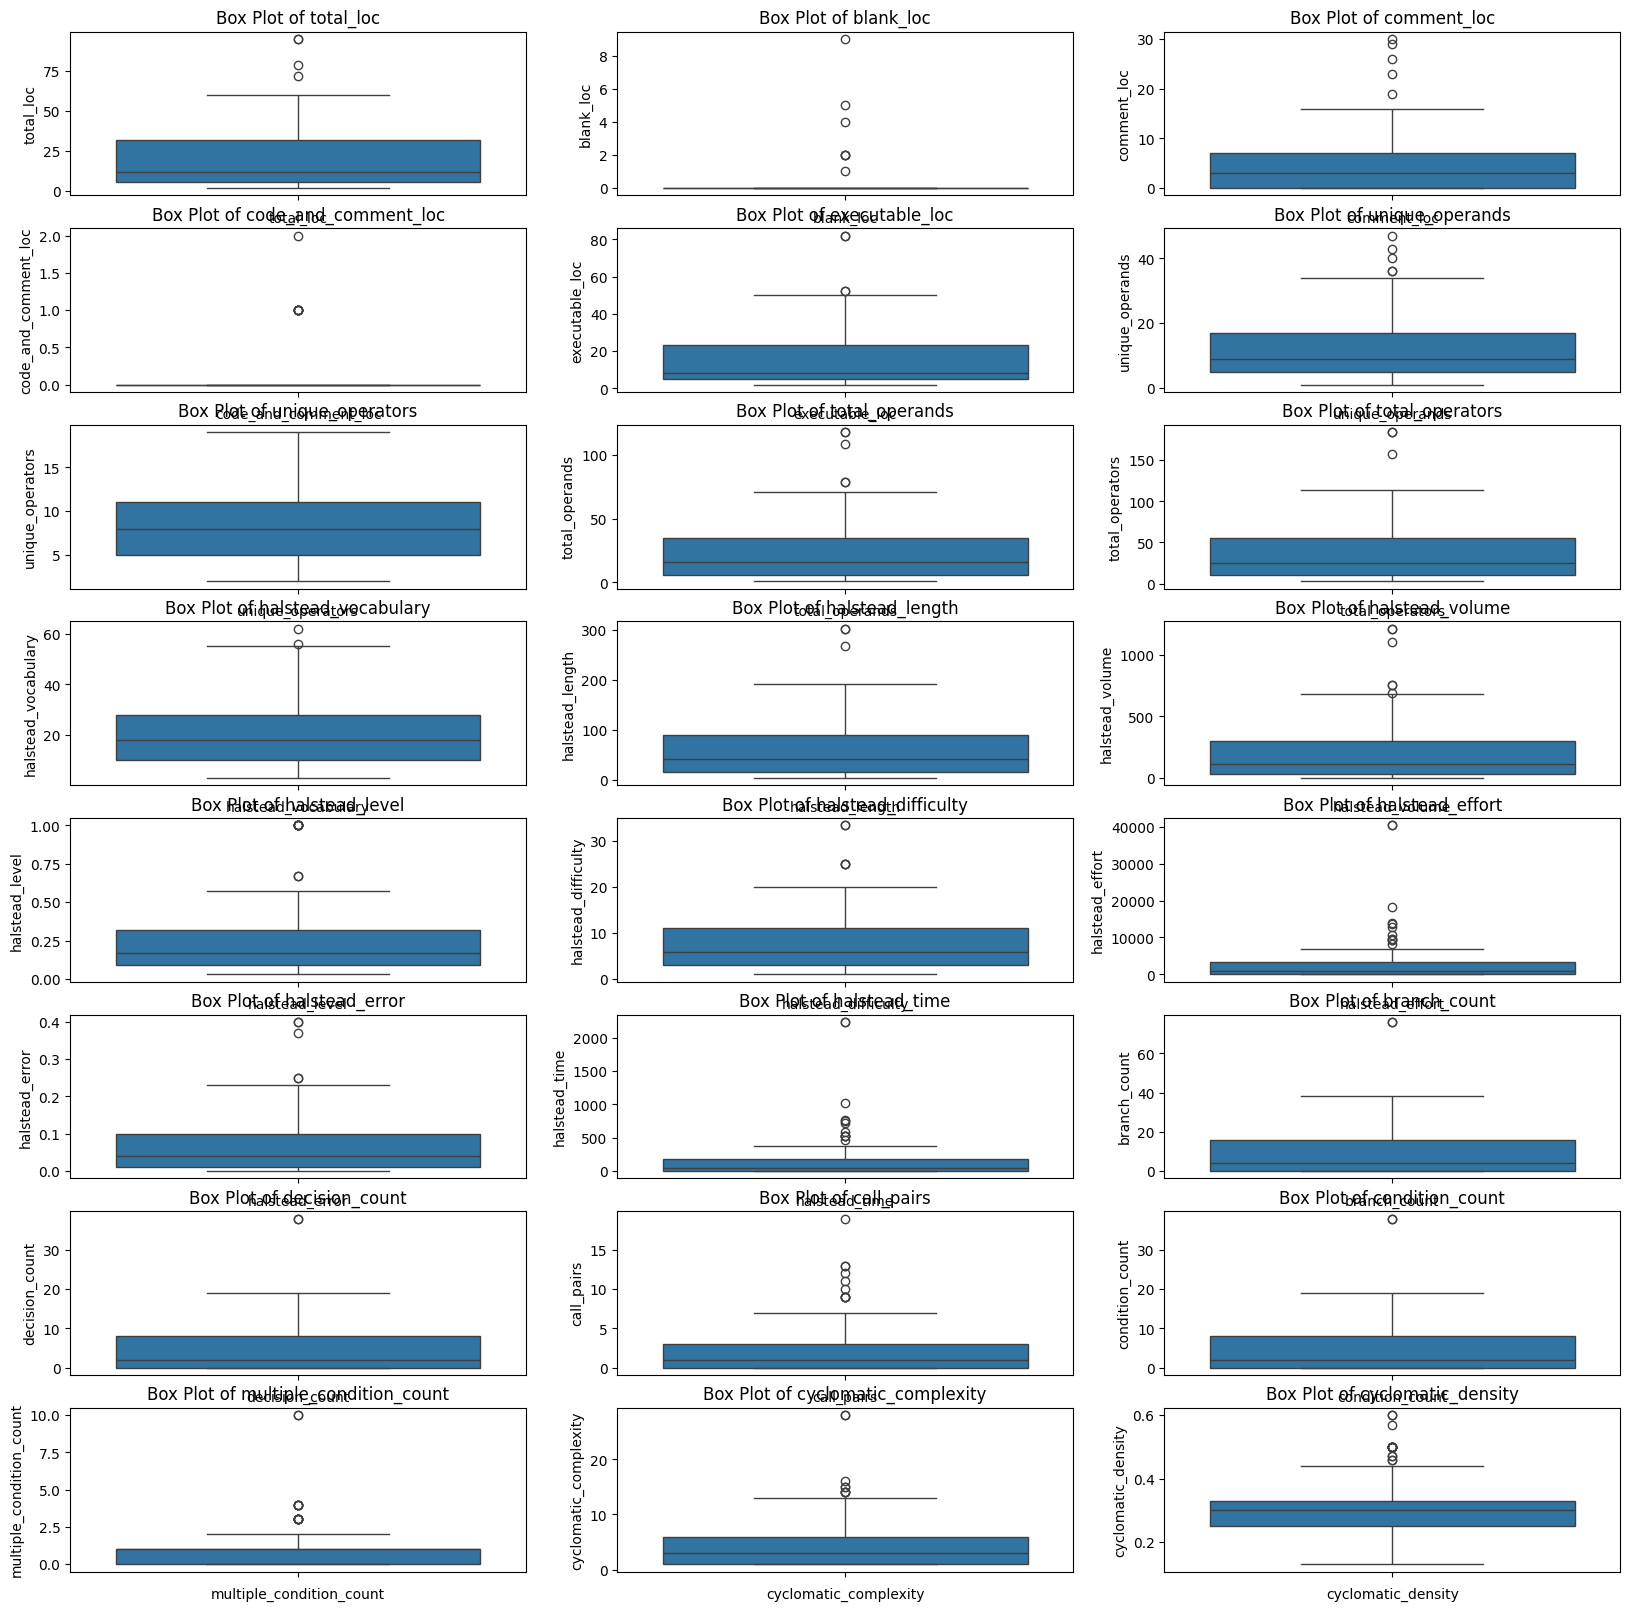

In [18]:
numerical_features = df.columns.tolist()

# Create KDE plots for each numerical feature
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(8, 3, i)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

## KDE Distribution

In [ ]:
df.columns.tolist()

In [ ]:
numerical_features = df.columns.tolist()

# Create KDE plots for each numerical feature
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df[feature])
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

Analysis
* From the KDE Distribution we get that most of the data samples have halstead's program length between 0 to 0.25.
* Non-Defective modules are 5x more than Defective Modules

# Balancing using NearMiss

In [19]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Define file paths
output_file_path = "/content/drive/MyDrive/CAPSTONE/balanced_AR1_nearmiss.csv"

# Load JM1 dataset
AR1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/ar1.csv")


# Preprocess data
X = AR1_data.drop(columns=["defects"])
y = AR1_data["defects"]

# Convert categorical labels to binary labels
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Display class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Apply NearMiss algorithm
nearmiss = NearMiss()
X_resampled, y_resampled = nearmiss.fit_resample(X, y_binary)

# Convert binary labels back to original categorical labels
y_resampled_labels = label_encoder.inverse_transform(y_resampled)

# Display class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled_labels))

# Save balanced dataset to a new file
balanced_AR1 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled_labels, columns=["defects"])], axis=1)
balanced_AR1.to_csv(output_file_path, index=False)

Class distribution before balancing: Counter({"b'false'": 112, "b'true'": 9})
Class distribution after balancing: Counter({"b'false'": 9, "b'true'": 9})


# Model Training and Accuracy Analysis

## Balanced using NearMiss

* **Logistic Regression Test Accuracy: 86.37694213015087**
* **Random Forest Test Accuracy: 91.30826390452602**
* **SVM Test Accuracy: 72.07836072956542**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
# Load the balanced dataset generated using nearmiss
balanced_ar1_nearmiss = pd.read_csv("/content/drive/MyDrive/CAPSTONE/balanced_AR1_nearmiss.csv")

# Split the data into features and target variable
balanced_X_nearmiss = balanced_ar1_nearmiss.drop(columns=["defects"])
balanced_y_nearmiss = balanced_ar1_nearmiss["defects"]

### Logistic Regression

**Why I choice Logistic Regression?**
* Used for binary classification
* Linear Relationship between input features and target features

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Split the data into training and testing sets
X_train_nearmiss, X_test_nearmiss, y_train_nearmiss, y_test_nearmiss = train_test_split(balanced_X_nearmiss, balanced_y_nearmiss, test_size=0.2, random_state=12)

# Train Logistic Regression on the balanced dataset generated using nearmiss
logistic_classifier_nearmiss = LogisticRegression(random_state=12)
logistic_classifier_nearmiss.fit(X_train_nearmiss, y_train_nearmiss)

# Training Accuracy
y_train_nearmiss_pred = logistic_classifier_nearmiss.predict(X_train_nearmiss)
accuracy_nearmiss = accuracy_score(y_train_nearmiss, y_train_nearmiss_pred)
print("Logistic Regression Training Accuracy: ", accuracy_nearmiss*100)

# Predict on the test set
y_pred_nearmiss = logistic_classifier_nearmiss.predict(X_test_nearmiss)

# Calculate accuracy
accuracy_nearmiss = accuracy_score(y_test_nearmiss, y_pred_nearmiss)
print("Logistic Regression Test Accuracy: ", accuracy_nearmiss*100)


Logistic Regression Training Accuracy:  100.0
Logistic Regression Test Accuracy:  50.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

**Why I choose it?**
* ar1 is high dimentional dataset with many features.
* The model best deals with outlier which the dataset has...
* The model reduces overfitting.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Split the data into training and testing sets
X_train_nearmiss, X_test_nearmiss, y_train_nearmiss, y_test_nearmiss = train_test_split(balanced_X_nearmiss, balanced_y_nearmiss, test_size=0.2, random_state=42)

# Train RandomForestClassifier on the balanced dataset generated using nearmiss
rf_classifier_nearmiss = RandomForestClassifier(random_state=42)
rf_classifier_nearmiss.fit(X_train_nearmiss, y_train_nearmiss)

# Training Accuracy
y_train_nearmiss_pred = rf_classifier_nearmiss.predict(X_train_nearmiss)
accuracy_nearmiss = accuracy_score(y_train_nearmiss, y_train_nearmiss_pred)
print("Random Forest Training Accuracy: ", accuracy_nearmiss*100)

# Predict on the test set
y_pred_nearmiss = rf_classifier_nearmiss.predict(X_test_nearmiss)

# Calculate accuracy
accuracy_nearmiss = accuracy_score(y_test_nearmiss, y_pred_nearmiss)
print("Randon Forest Test Accuracy: ", accuracy_nearmiss*100)


Random Forest Training Accuracy:  100.0
Randon Forest Test Accuracy:  100.0


### Support Vector Machine

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
# Split the data into training and testing sets
X_train_nearmiss, X_test_nearmiss, y_train_nearmiss, y_test_nearmiss = train_test_split(balanced_X_nearmiss, balanced_y_nearmiss, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) on the balanced dataset generated using nearmiss
svm_classifier_nearmiss = SVC(random_state=42)
svm_classifier_nearmiss.fit(X_train_nearmiss, y_train_nearmiss)

# Training Accuracy
y_train_nearmiss_pred = svm_classifier_nearmiss.predict(X_train_nearmiss)
accuracy_nearmiss = accuracy_score(y_train_nearmiss, y_train_nearmiss_pred)
print("SVM Training Accuracy: ", accuracy_nearmiss*100)

# Predict on the test set
y_pred_nearmiss = svm_classifier_nearmiss.predict(X_test_nearmiss)

# Calculate accuracy
accuracy_nearmiss = accuracy_score(y_test_nearmiss, y_pred_nearmiss)
print("SVM Test Accuracy:", accuracy_nearmiss*100)

SVM Training Accuracy:  64.28571428571429
SVM Test Accuracy: 0.0


### KNN

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data from CSV file
data = pd.read_csv(output_file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize kNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels of test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.75


### Gradient Boosting

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load data from CSV file
data = pd.read_csv(output_file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gradient_boosting.fit(X_train, y_train)

# Predict the labels of test data
y_pred = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5
